In [ ]:
!pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html   

In [ ]:
!pip install transformers ipywidgets gradio --upgrade

In [ ]:
!pip install sentencepiece

In [ ]:
!pip install easyocr

In [5]:
!pip install soynlp

/usr/local/lib/python3.7/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import sys, os

In [6]:
import gradio as gr
from transformers import pipeline
from transformers import MarianMTModel, MarianTokenizer

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from soynlp.hangle import jamo_levenshtein

labels_file_path = '/content/drive/MyDrive/Colab Notebooks/project3/labels.txt'

def find_gt(predicted, labels_file_path, prob):

    min_norm_ed = 1.5
    label = predicted
    if prob < 0.77:
        with open(labels_file_path, encoding='UTF-8') as labels_file:
            for line in labels_file.readlines():
                gt = line.replace("\n", "")
                current_norm_ed = jamo_levenshtein(gt, predicted)
                if current_norm_ed == 0.0:
                    label = gt
                    break
                elif min_norm_ed > current_norm_ed:
                    min_norm_ed = current_norm_ed
                    label = gt

    if label is not predicted:
        print("{}   {} --> {}, {}".format(prob, predicted, label, min_norm_ed))
    return label

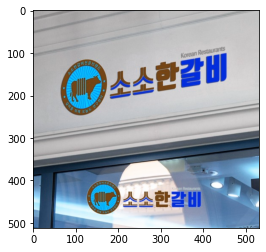

In [8]:
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/project3/image.jpg')
plt.imshow(img2)

In [9]:
reader = easyocr.Reader(['ko', 'en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

[([[206, 418], [404, 418], [404, 474], [206, 474]],
  '소소한갈비',
  0.9751581361238163),
 ([[384.21114561800016, 93.10557280900008],
   [454.8666912124061, 83.28204184138227],
   [456.78885438199984, 99.89442719099992],
   [386.1333087875939, 109.71795815861773]],
  'Resiauans',
  0.6763816017497336),
 ([[344.36153615896194, 100.85307531127334],
   [388.76094219984435, 94.05180035392996],
   [390.63846384103806, 110.14692468872666],
   [346.23905780015565, 116.94819964607004]],
  'Korean',
  0.5303073559015229),
 ([[165.30029963302027, 131.64083897245678],
   [463.9321430538638, 86.27215330646337],
   [471.6997003669797, 180.35916102754322],
   [173.0678569461362, 224.72784669353663]],
  '소소한갈비',
  0.5666313323700897)]

In [ ]:
results = reader.readtext('/content/drive/MyDrive/Colab Notebooks/project3/image.jpg')

In [ ]:
largest_bbox = results[0]
tl, tr, br, bl = largest_bbox[0]
largest_bbox_size = (int(tr[0])-int(tl[0])) * (int(bl[1])-int(tl[1]))

for (bbox, text, prob) in results:
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    bbox_size = (int(tr[0])-int(tl[0])) * (int(bl[1])-int(tl[1]))
    bbox = (tl, tr, br, bl)
    if bbox_size > largest_bbox_size:
        largest_bbox = (bbox, text, prob)
        largest_bbox_size = bbox_size
    else:
        continue
(bbox, text, prob) = largest_bbox
text = text.replace(" ", "")
text = find_gt(text, labels_file_path, prob)

result = (bbox, text, prob)

In [10]:
sen=[]
for i in range(0,len(result)):
    sen.append(result[i][1])
print(sen)

['소소한갈비', 'Resiauans', 'Korean', '소소한갈비']


In [11]:
def translate_transformers(from_text):
    tokenizer=MarianTokenizer.from_pretrained('inhee/opus-mt-ko-en-finetuned-ko-to-en')
    model = MarianMTModel.from_pretrained('inhee/opus-mt-ko-en-finetuned-ko-to-en')
    translated = model.generate(**tokenizer(from_text, return_tensors="pt", padding=True))
    return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

In [12]:
for j in sen:
    print(translate_transformers(j))

Downloading:   0%|          | 0.00/822k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.76M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/300 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/296M [00:00<?, ?B/s]

['Sosawan Galbi']
['reciauans']
['Correan']
['Sosawan Galbi']


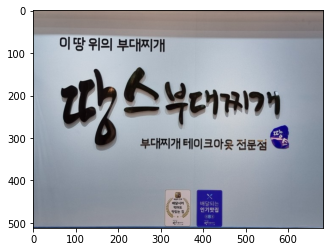

In [13]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/project3/image2.jpg')
plt.imshow(img)

In [14]:
reader = easyocr.Reader(['ko', 'en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


[([[56, 56], [316, 56], [316, 104], [56, 104]],
  '이땅 위의 부대찌개',
  0.8801038026849786),
 ([[40, 92], [615, 92], [615, 340], [40, 340]], '땅스무p?', 0.04348864493008425),
 ([[560, 278], [588, 278], [588, 304], [560, 304]], '땅', 0.9980734338064998),
 ([[249, 295], [555, 295], [555, 337], [249, 337]],
  '부대찌개 테이크마옷 전문점',
  0.6113800792821024),
 ([[326, 450], [354, 450], [354, 458], [326, 458]],
  '내다시거',
  0.6370297495160201),
 ([[391, 447], [439, 447], [439, 463], [391, 463]],
  '배달되는',
  0.9710615277290344),
 ([[328, 460], [350, 460], [350, 466], [328, 466]],
  "'o어다",
  0.03926441818475723),
 ([[389, 459], [439, 459], [439, 479], [389, 479]],
  '인기맛집',
  0.9981412887573242),
 ([[401, 479], [427, 479], [427, 493], [401, 493]], '60', 0.16062315059462418)]

In [ ]:
result = reader.readtext('/content/drive/MyDrive/Colab Notebooks/project3/image2.jpg')

In [ ]:
largest_bbox = results[0]
tl, tr, br, bl = largest_bbox[0]
largest_bbox_size = (int(tr[0])-int(tl[0])) * (int(bl[1])-int(tl[1]))

for (bbox, text, prob) in results:
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    bbox_size = (int(tr[0])-int(tl[0])) * (int(bl[1])-int(tl[1]))
    bbox = (tl, tr, br, bl)
    if bbox_size > largest_bbox_size:
        largest_bbox = (bbox, text, prob)
        largest_bbox_size = bbox_size
    else:
        continue
(bbox, text, prob) = largest_bbox
text = text.replace(" ", "")
text = find_gt(text, labels_file_path, prob)

result = (bbox, text, prob)

In [15]:
sen=[]
for i in range(0,len(result)):
    sen.append(result[i][1])
print(sen)

['이땅 위의 부대찌개', '땅스무p?', '땅', '부대찌개 테이크마옷 전문점', '내다시거', '배달되는', "'o어다", '인기맛집', '60']


In [16]:
def translate_transformers(from_text):
    tokenizer=MarianTokenizer.from_pretrained('inhee/opus-mt-ko-en-finetuned-ko-to-en')
    model = MarianMTModel.from_pretrained('inhee/opus-mt-ko-en-finetuned-ko-to-en')
    translated = model.generate(**tokenizer(from_text, return_tensors="pt", padding=True))
    return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

In [17]:
for j in sen:
    print(translate_transformers(j))

['battalion on top of the land']
['Landsofe?']
['ground']
['band-chip-tike wear shop']
['My Dagger']
['delivery']
["'Ouda"]
['popular tea shop']
['60']


In [18]:
sen = ['이 땅 위의 부대찌개' , '땅스부대찌개', '부대찌개 테이크아웃 전문점', '인기맛집']

In [19]:
for j in sen:
    print(translate_transformers(j))

['battalion on the ground']
['ground-stack']
['batik-out shop']
['popular tea shop']


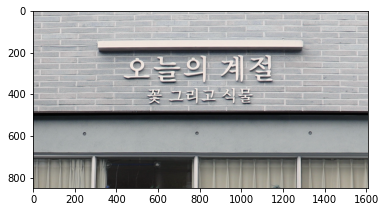

In [20]:
img3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/project3/image3.jpg')
plt.imshow(img3)

In [21]:
reader = easyocr.Reader(['ko', 'en'], gpu=False)
result = reader.readtext('/content/drive/MyDrive/Colab Notebooks/project3/image3.jpg')
for (bbox, text, prob) in result:
    text = text.replace(" ", "")
    text = find_gt(text, labels_file_path, prob)
result

Using CPU. Note: This module is much faster with a GPU.


[([[436, 195], [1157, 195], [1157, 360], [436, 360]],
  '오늘의 계절',
  0.9960852555652949),
 ([[533, 356], [1062, 356], [1062, 458], [533, 458]],
  '꽃 그리고 식물',
  0.6389629607918764)]

In [22]:
sen=[]
for i in range(0,len(result)):
    sen.append(result[i][1])
print(sen)

['오늘의 계절', '꽃 그리고 식물']


In [23]:
for j in sen:
    print(translate_transformers(j))

['season of the day']
['Flowers and Plants']
